In [60]:
import numpy as np
import pandas as pd
from scipy.fft import fft, ifft
import cmath

# from processing_func import from_S_to_T, from_T_to_S
# from file_opener import run

In [61]:
%matplotlib widget
import matplotlib.pyplot as plt

In [62]:
###de_embadding = False # указать, нужен или не нужен
time_gating = True # указать, нужен или не нужен

### Импорт сырых данных из .s2p файла и перевод их в комплексные числа

In [63]:
data_object_off = pd.read_csv('C:\\Users\\isvoropaev\\Desktop\\python_codes\\post_processing_RIS\\20sept\\struct_minus1V.s2p', sep=' ', header=None, skiprows=5, skipinitialspace=True, index_col=False,
                names=['Frequency', 'ReS11', 'ImS11', 'ReS21', 'ImS21', 'ReS12', 'ImS12', 'ReS22', 'ImS22'])

data_object_on = pd.read_csv('C:\\Users\\isvoropaev\Desktop\\python_codes\\post_processing_RIS\\20sept\\struct_5A.s2p', sep=' ', header=None, skiprows=5, skipinitialspace=True, index_col=False,
                names=['Frequency', 'ReS11', 'ImS11', 'ReS21', 'ImS21', 'ReS12', 'ImS12', 'ReS22', 'ImS22'])

data_screen = pd.read_csv('C:\\Users\\isvoropaev\\Desktop\\python_codes\\post_processing_RIS\\20sept\\screen.s2p', sep=' ', header=None, skiprows=5, skipinitialspace=True, index_col=False,
                names=['Frequency', 'ReS11', 'ImS11', 'ReS21', 'ImS21', 'ReS12', 'ImS12', 'ReS22', 'ImS22'])

data_free = pd.read_csv('C:\\Users\\isvoropaev\\Desktop\\python_codes\\post_processing_RIS\\20sept\\free.s2p', sep=' ', header=None, skiprows=5, skipinitialspace=True, index_col=False,
                names=['Frequency', 'ReS11', 'ImS11', 'ReS21', 'ImS21', 'ReS12', 'ImS12', 'ReS22', 'ImS22'])

In [64]:
data_object_on.head() # Смотрим корректность импорта данных

,Frequency,ReS11,ImS11,ReS21,ImS21,ReS12,ImS12,ReS22,ImS22
0,2.000000e+10,-0.195550,-0.246286,-0.009253,-0.008983,-0.011799,-0.005394,0.145516,0.017178
1,2.000200e+10,-0.189117,-0.241099,-0.009804,-0.007954,-0.012474,-0.005371,0.142801,0.028339
2,2.000400e+10,-0.182785,-0.232133,-0.010145,-0.007024,-0.012067,-0.004210,0.140672,0.027012
3,2.000600e+10,-0.174649,-0.220860,-0.010472,-0.006277,-0.012151,-0.002827,0.133947,0.030562
4,2.000800e+10,-0.165443,-0.205959,-0.010929,-0.005357,-0.011467,-0.002401,0.131503,0.032336


Перевод данных в вид комплексных чисел

In [65]:
for dataset in [data_object_off, data_object_on, data_screen, data_free]: # это массив из указателей на соответствующие
    dataset['s11']=dataset['ReS11']+1j*dataset['ImS11']
    dataset['s21']=dataset['ReS21']+1j*dataset['ImS21']
    dataset['s12']=dataset['ReS12']+1j*dataset['ImS12']
    dataset['s22']=dataset['ReS22']+1j*dataset['ImS22']

Удаление исходных колонок

In [66]:
data_object_off = data_object_off.drop(['ReS11', 'ImS11', 'ReS21', 'ImS21', 'ReS12', 'ImS12', 'ReS22', 'ImS22'], axis=1)
data_object_on = data_object_on.drop(['ReS11', 'ImS11', 'ReS21', 'ImS21', 'ReS12', 'ImS12', 'ReS22', 'ImS22'], axis=1)
data_screen = data_screen.drop(['ReS11', 'ImS11', 'ReS21', 'ImS21', 'ReS12', 'ImS12', 'ReS22', 'ImS22'], axis=1)
data_free = data_free.drop(['ReS11', 'ImS11', 'ReS21', 'ImS21', 'ReS12', 'ImS12', 'ReS22', 'ImS22'], axis=1)

In [67]:
data_object_off.head() # просмотр нового датасета

,Frequency,s11,s21,s12,s22
0,2.000000e+10,-0.133948-0.259947j,-0.009688-0.006547j,-0.011550-0.003170j,0.153475+0.019629j
1,2.000200e+10,-0.128202-0.259815j,-0.009910-0.005070j,-0.011568-0.002393j,0.150975+0.026529j
2,2.000400e+10,-0.123223-0.257294j,-0.010119-0.004240j,-0.010515-0.001109j,0.143552+0.030200j
3,2.000600e+10,-0.117235-0.251125j,-0.010189-0.003464j,-0.010001+0.000120j,0.140816+0.029395j
4,2.000800e+10,-0.111300-0.241679j,-0.010302-0.002358j,-0.010360+0.000740j,0.139108+0.031576j


Создаем переменные, с которыми будем непосредственно работать (массивы формата `pd.Series`)

In [68]:
frequency = data_object_off['Frequency']

s11_object_off = data_object_off['s11']

s11_object_on = data_object_on['s11']

s11_screen = data_screen['s11']

s11_free = data_free['s11']

### Предпросмотр графиков необработанных файлов

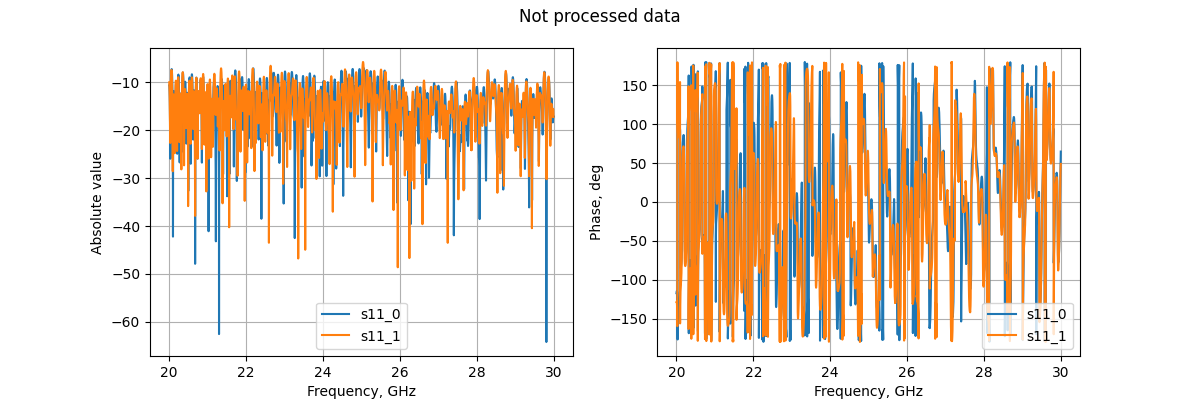

In [69]:
s_par = ['s11'] # Вести сюда названия S-параметров, которые нужны на графике в формате 'sij'
data = [data_object_off, data_object_on] # Ввести сюда какие измерения нужны


'''Дальше  не трогать!!!'''
fig = plt.figure(figsize=(12,4))

ax_1 = fig.add_subplot(121)
ax_2 = fig.add_subplot(122)
for i, dataset in enumerate(data):
    for elem in s_par:
        ax_1.plot(dataset['Frequency']*1e-9, 20*np.log10(dataset[elem].apply(abs).to_numpy()), label=elem+'_'+str(i))
        ax_2.plot(dataset['Frequency']*1e-9, np.degrees(dataset[elem].apply(cmath.phase)), label=elem+'_'+str(i))

ax_1.set_xlabel("Frequency, GHz")
ax_1.set_ylabel("Absolute value")
ax_1.legend()
ax_1.grid()

ax_2.set_xlabel("Frequency, GHz")
ax_2.set_ylabel("Phase, deg")
ax_2.legend()
ax_2.grid()


fig.suptitle('Not processed data')
#plt.tight_layout()
plt.show()

### Time-Gating

In [70]:
N_fft = 2 ** 22 # количиство точек во временной области
# Должно иметь степень двойки для большей скорости и быть большем, чем количество частотных точек
T_max = 1 / (frequency[1]-frequency[0]) # продолжительность измеряемого импульса, определяется из количества измеряемых частотных точек
print(T_max)

4.998999999987752e-07


In [71]:
time = T_max*np.linspace(0, 1 + T_max, N_fft) # набор точек во временной области
time[-1] # последний элемент

4.999002498987852e-07

Просмотр S-параметров во временной области

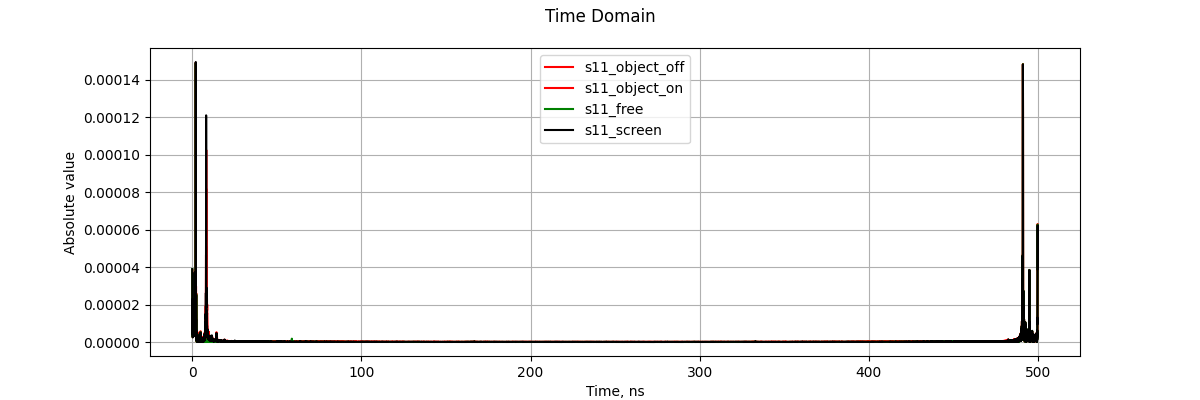

In [72]:
fig2 = plt.figure(figsize=(12,4))

ax_1 = fig2.add_subplot(111)
ax_1.plot(time*1e9, abs(ifft(s11_object_off.to_numpy(), n=N_fft)),'r', label='s11_object_off')
ax_1.plot(time*1e9, abs(ifft(s11_object_on.to_numpy(), n=N_fft)),'r', label='s11_object_on')
ax_1.plot(time*1e9, abs(ifft(s11_free.to_numpy(), n=N_fft)),'g', label='s11_free')
ax_1.plot(time*1e9, abs(ifft(s11_screen.to_numpy(), n=N_fft)),'k', label='s11_screen')

ax_1.set_xlabel("Time, ns")
ax_1.set_ylabel("Absolute value")
ax_1.legend()
ax_1.grid()


fig2.suptitle('Time Domain')
plt.show()

In [73]:
gate_s11 = np.array([[0, 7], [10, 900]])*1e-9 # заполнить промежутками времени, которые необходимо вырезать в нс

In [74]:
def time_gate_s_param(gate: np.ndarray, s_par: pd.core.series.Series, n=N_fft, time=time):
    s = s_par.to_numpy()
    time_dom_s = pd.Series(ifft(s, n=n))
    for k in range(gate.shape[0]):
        if len(gate[k, :]) != 0:
            numbers = (time >= gate[k, 0]) & (time <= gate[k, 1])
            time_dom_s.loc[numbers] = 0
            #print(time_dom_s.head())
    s_new = fft(time_dom_s.to_numpy())
    s_new = s_new[0:len(frequency)]
    return pd.Series(s_new)

Проведение тайм-гейтинга

In [75]:
if time_gating == True:
    s11_object_off = time_gate_s_param(gate=gate_s11, s_par=s11_object_off)
    s11_object_on = time_gate_s_param(gate=gate_s11, s_par=s11_object_on)
    s11_screen = time_gate_s_param(gate=gate_s11, s_par=s11_screen)
    s11_free = time_gate_s_param(gate=gate_s11, s_par=s11_free)

In [76]:
s11_object_on.shape # проверка, что число точек осталось таким же, как в исходных данных

(5000,)

Просмотр S-параметров после тайм-гейтинга

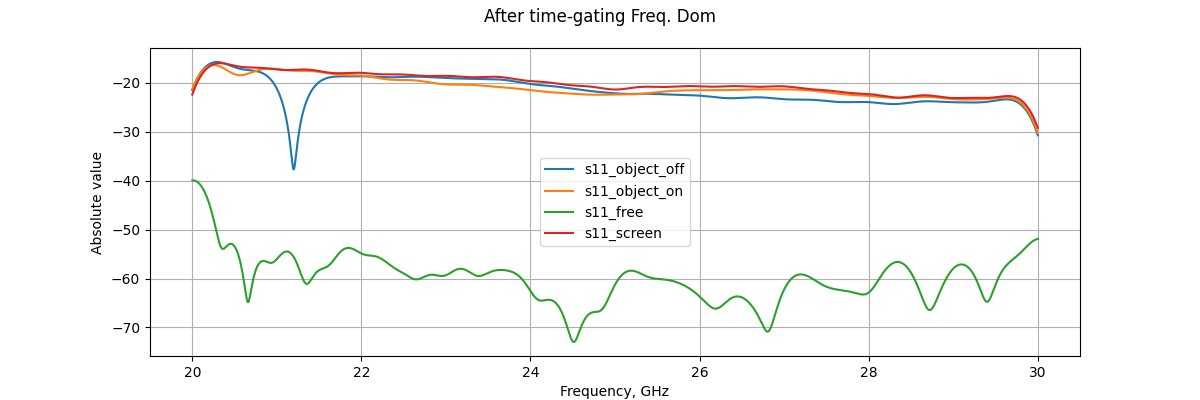

In [77]:
param = [s11_object_off, s11_object_on, s11_free, s11_screen]
name = ['s11_object_off', 's11_object_on', 's11_free', 's11_screen']

fig3 = plt.figure(figsize=(12,4))

ax_1 = fig3.add_subplot(111)

for i, s_par in enumerate(param):
    ax_1.plot(frequency*1e-9, 20*np.log10(s_par.apply(abs).to_numpy()), label=name[i])
ax_1.set_xlabel("Frequency, GHz")
ax_1.set_ylabel("Absolute value")
ax_1.legend()
ax_1.grid()


fig3.suptitle('After time-gating Freq. Dom')
plt.show()

### Итоговые выражения для коэффициента отражения

In [78]:
Gamma_off = -(s11_object_off - s11_free) / (s11_screen - s11_free)
Gamma_on = -(s11_object_on - s11_free) / (s11_screen - s11_free)

In [79]:
n = pd.Series([1, 2, 3, 4])
d = pd.Series([5, 6, 7, 8])
n / d

0    0.200000
1    0.333333
2    0.428571
3    0.500000
dtype: float64

### Импорт графиков из CST

In [80]:
reflecting_coef_off = pd.read_csv('C:\\Users\\isvoropaev\\Desktop\\python_codes\\post_processing_RIS\\initial_codes\\ND_struct_0deg_s11_TM.txt', sep='\t', header=None, skiprows=3, index_col=False, 
                names=['Frequency', 'ReSz11', 'ImSz11', 'Impedance_Re', 'Impedance_Im'])
reflecting_coef_on = pd.read_csv('On_0_deg.txt', sep='\t', header=None, skiprows=3, index_col=False,
                names=['Frequency', 'ReSz11', 'ImSz11', 'Impedance_Re', 'Impedance_Im'])

In [81]:
reflecting_coef_off.head()

,Frequency,ReSz11,ImSz11,Impedance_Re,Impedance_Im
0,20.00,-0.781365,0.619350,NaN,NaN
1,20.01,-0.780787,0.620059,NaN,NaN
2,20.02,-0.780207,0.620770,NaN,NaN
3,20.03,-0.779624,0.621482,NaN,NaN
4,20.04,-0.779039,0.622196,NaN,NaN


In [82]:
reflecting_coef_off['Sz11'] = reflecting_coef_off['ReSz11'] + 1j*reflecting_coef_off['ImSz11']
reflecting_coef_on['Sz11'] = reflecting_coef_on['ReSz11'] + 1j*reflecting_coef_on['ImSz11']

In [83]:
reflecting_coef_off = reflecting_coef_off.drop(['ReSz11', 'ImSz11', 'Impedance_Re', 'Impedance_Im'], axis=1)
reflecting_coef_on = reflecting_coef_on.drop(['ReSz11', 'ImSz11', 'Impedance_Re', 'Impedance_Im'], axis=1)

In [84]:
reflecting_coef_off.head()

,Frequency,Sz11
0,20.00,-0.781365+0.619350j
1,20.01,-0.780787+0.620059j
2,20.02,-0.780207+0.620770j
3,20.03,-0.779624+0.621482j
4,20.04,-0.779039+0.622196j


In [85]:
cst_freq = reflecting_coef_off['Frequency']
cst_Gamma_on = reflecting_coef_on['Sz11']
cst_Gamma_off = reflecting_coef_off['Sz11']

### Сравенние графиков с результатами CST

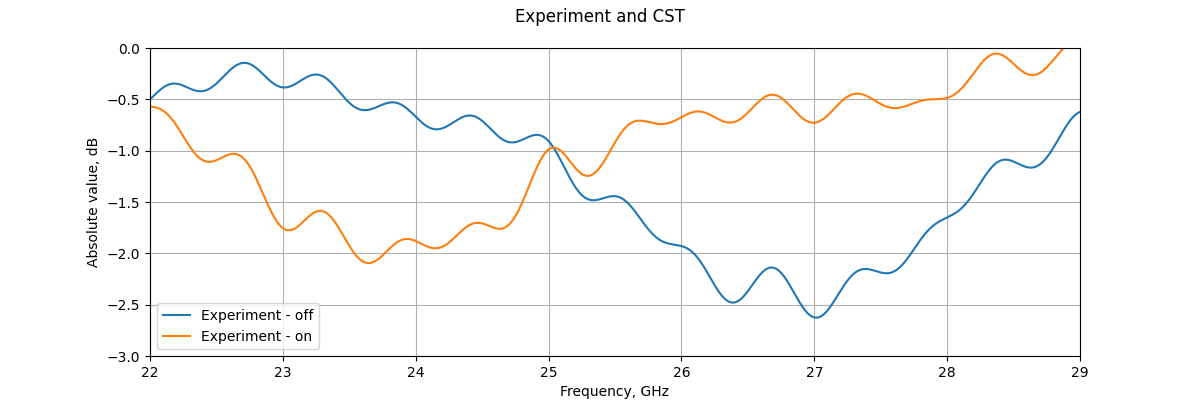

In [87]:
fig4 = plt.figure(figsize=(12,4))

ax_1 = fig4.add_subplot(111)

ax_1.plot(frequency*1e-9, 20*np.log10(Gamma_off.apply(abs).to_numpy()), label='Experiment - off')
ax_1.plot(frequency*1e-9, 20*np.log10(Gamma_on.apply(abs).to_numpy()), label='Experiment - on')

# ax_1.plot(frequency*1e-9, 20*np.log10(Gamma_off.apply(abs).to_numpy()), label='No Voltage')
# ax_1.plot(frequency*1e-9, 20*np.log10(Gamma_on.apply(abs).to_numpy()), label='Inverse voltage')

# ax_1.plot(cst_freq, 20*np.log10(cst_Gamma_off.apply(abs).to_numpy()), label='CST Modeling - off')
# ax_1.plot(cst_freq, 20*np.log10(cst_Gamma_on.apply(abs).to_numpy()), label='CST Modeling - on')
ax_1.set_xlabel("Frequency, GHz")
ax_1.set_ylabel("Absolute value, dB")
ax_1.set_xlim(left=22, right=29)
ax_1.set_ylim(bottom=-3, top=0)
ax_1.legend()
ax_1.grid()


fig4.suptitle('Experiment and CST')
plt.show()

In [ ]:
print(reflecting_coef_off.query("Frequency > 24.996 & Frequency < 25.004"))
print(reflecting_coef_on.query("Frequency > 24.996 & Frequency < 25.004"))
print(reflecting_coef_off['Sz11'].iloc[430] / reflecting_coef_on['Sz11'].iloc[430]) # отношение коэффициентов отражения
print(np.degrees(cmath.phase(reflecting_coef_off['Sz11'].iloc[430] / reflecting_coef_on['Sz11'].iloc[430])))

In [ ]:
fig6 = plt.figure(figsize=(12,4))

ax_1 = fig6.add_subplot(111)

ax_1.plot(frequency*1e-9, np.degrees(pd.Series(Gamma_off).apply(cmath.phase).to_numpy()), label='Experiment')
ax_1.plot(cst_freq, np.degrees(pd.Series(cst_Gamma_off).apply(cmath.phase).to_numpy()), label='Modeling')

ax_1.set_xlabel("Frequency, GHz")
ax_1.set_ylabel("Phase, deg")
ax_1.set_xlim(left=22, right=29)
ax_1.legend()
ax_1.grid()


fig6.suptitle('Experiment and CST (OFF)')
plt.show()

In [ ]:
Gamma_on = 1+1j
cst_Gamma_on = -1+1j
cst_freq = 25
frequency = 25*1e9

In [ ]:
fig7 = plt.figure(figsize=(12,4))

ax_1 = fig7.add_subplot(111)

ax_1.scatter(frequency*1e-9, np.degrees(pd.Series(Gamma_on).apply(cmath.phase).to_numpy()), label='Experiment')
ax_1.scatter(cst_freq, np.degrees(pd.Series(cst_Gamma_on).apply(cmath.phase).to_numpy()), label='Modeling')

ax_1.set_xlabel("Frequency, GHz")
ax_1.set_ylabel("Phase, deg")
ax_1.set_xlim(left=22, right=29)
ax_1.legend()
ax_1.grid()


fig7.suptitle('Experiment and CST (ON)')
plt.show()

In [ ]:
fig5 = plt.figure(figsize=(12,4))

ax_1 = fig5.add_subplot(111)

ax_1.plot(frequency*1e-9, np.degrees(pd.Series(Gamma_off / Gamma_on).apply(cmath.phase).to_numpy()), label='Experiment')
ax_1.scatter([25], [180], color='r', label = r'25 GHz, $\Delta\phi = 180$')
ax_1.plot(cst_freq, np.degrees(pd.Series(cst_Gamma_off / cst_Gamma_on).apply(cmath.phase).to_numpy()), label='Modeling')

# ax_1.plot(frequency*1e-9, np.degrees(pd.Series(Gamma_off).apply(cmath.phase).to_numpy()), label='off')
# ax_1.plot(frequency*1e-9, np.degrees(pd.Series(Gamma_on).apply(cmath.phase).to_numpy()), label='on')
ax_1.set_xlabel("Frequency, GHz")
ax_1.set_ylabel("Phase, deg")
ax_1.set_xlim(left=22, right=29)
ax_1.legend()
ax_1.grid()


fig5.suptitle('Experiment and CST')
plt.show()